### Gustaw Cyburt

# Modeling prior predictive distribution

In [3]:
import cmdstanpy
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [15]:
model = cmdstanpy.CmdStanModel(stan_file='model.stan')
samples = model.sample(fixed_param=True, iter_sampling=1000)

INFO:cmdstanpy:compiling stan file /home/AGH-Data-Analytics/lab_3/model.stan to exe file /home/AGH-Data-Analytics/lab_3/model
INFO:cmdstanpy:compiled model executable: /home/AGH-Data-Analytics/lab_3/model
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/AGH-Data-Analytics/lab_3/model.hpp /home/AGH-Data-Analytics/lab_3/model.stan
Warning in '/home/AGH-Data-Analytics/lab_3/model.stan', line 7, column 15: Found
    int division:
      y / N
    Values will be rounded towards zero. If rounding is not desired you can
    write
    the division as
      y * 1.0 / N
    If rounding is intended please use the integer division operator %/%.

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/l


INFO:cmdstanpy:CmdStan done processing.


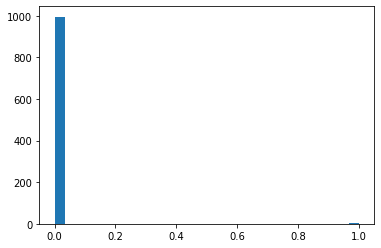

In [19]:
ratios = samples.stan_variable('ratio')
hist = plt.hist(ratios, bins=30)

# Modeling posterior and posterior predictive distribution

INFO:cmdstanpy:compiling stan file /home/AGH-Data-Analytics/lab_3/model_2.stan to exe file /home/AGH-Data-Analytics/lab_3/model_2
INFO:cmdstanpy:compiled model executable: /home/AGH-Data-Analytics/lab_3/model_2
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


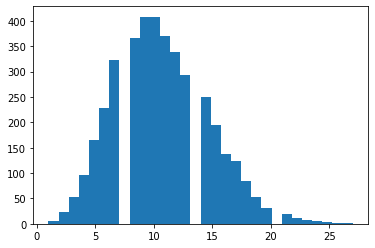

In [26]:
data = {'N': 50, 'y': 10}
model = cmdstanpy.CmdStanModel(stan_file='model_2.stan')
samples = model.sample(data=data)
y_pred = samples.stan_variable('y_pred')
hist = plt.hist(y_pred, bins=30)


In [27]:
import arviz as az

ratio_pred = y_pred / data['N']
az.summary({'ratio_pred': ratio_pred})


arviz - WARNING - Shape validation failed: input_shape: (1, 4000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
ratio_pred,0.213,0.08,0.08,0.36,0.002,0.001,2401.0,2930.0,NaN


In [29]:
avg_prob = 0.2
prob_lower = (ratio_pred < avg_prob).sum() / len(ratio_pred)
print(prob_lower)

0.41675
